In [4]:
# Housekeeping
import requests
import datetime
import pandas as pd
import io
import os

import oeutils
from pycaret.clustering import *

pd.options.display.max_rows = 100
pd.options.display.max_columns = 500

workingdir = '../data/'
years = ['2018', '2019', '2020', '2021']

#oeutils.download(workingdir, years)
df = oeutils.read('../data/')
#df = oeutils.clean(df, split_on=False, keep_identities=False, keep_leagues=False, keep_columns=False)

In [6]:
df.shape

(247941, 117)

In [7]:
df.head(12)

gameid datacompleteness  \
0   ESPORTSTMNT03/1241318         complete   
1   ESPORTSTMNT03/1241318         complete   
2   ESPORTSTMNT03/1241318         complete   
3   ESPORTSTMNT03/1241318         complete   
4   ESPORTSTMNT03/1241318         complete   
5   ESPORTSTMNT03/1241318         complete   
6   ESPORTSTMNT03/1241318         complete   
7   ESPORTSTMNT03/1241318         complete   
8   ESPORTSTMNT03/1241318         complete   
9   ESPORTSTMNT03/1241318         complete   
10  ESPORTSTMNT03/1241318         complete   
11  ESPORTSTMNT03/1241318         complete   

                                                  url league  year split  \
0   http://matchhistory.na.leagueoflegends.com/en/...  KeSPA  2020   NaN   
1   http://matchhistory.na.leagueoflegends.com/en/...  KeSPA  2020   NaN   
2   http://matchhistory.na.leagueoflegends.com/en/...  KeSPA  2020   NaN   
3   http://matchhistory.na.leagueoflegends.com/en/...  KeSPA  2020   NaN   
4   http://matchhistory.na.leagueoflegends.com/en/...  KeSPA  2020   NaN   
5   http://matchhistory.na.leagueoflegends.com/en/...  KeSPA  2020   NaN   
6   http://matchhistory.na.leagueoflegends.com/en/...  KeSPA  2020   NaN   
7   http://matchhistory.na.leagueoflegends.com/en/...  KeSPA  2020   NaN   
8   http://matchhistory.na.leagueoflegends.com/en/...  KeSPA  2020   NaN   
9   http://matchhistory.na.leagueoflegends.com/en/...  KeSPA  2020   NaN   
10  http://matchhistory.na.leagueoflegends.com/en/...  KeSPA  2020   NaN   
11  http://matchhistory.na.leagueoflegends.com/en/...  KeSPA  2020   NaN   

    playoffs                 date  game  patch  playerid  side position  \
0          0  2020-01-03 07:33:26     1   9.24         1  Blue      top   
1          0  2020-01-03 07:33:26     1   9.24         2  Blue      jng   
2          0  2020-01-03 07:33:26     1   9.24         3  Blue      mid   
3          0  2020-01-03 07:33:26     1   9.24         4  Blue      bot   
4          0  2020-01-03 07:33:26     1   9.24         5  Blue      sup   
5          0  2020-01-03 07:33:26     1   9.24         6   Red      top   
6          0  2020-01-03 07:33:26     1   9.24         7   Red      jng   
7          0  2020-01-03 07:33:26     1   9.24         8   Red      mid   
8          0  2020-01-03 07:33:26     1   9.24         9   Red      bot   
9          0  2020-01-03 07:33:26     1   9.24        10   Red      sup   
10         0  2020-01-03 07:33:26     1   9.24       100  Blue     team   
11         0  2020-01-03 07:33:26     1   9.24       200   Red     team   

     player            team      champion     ban1    ban2     ban3   ban4  \
0    Summit  SANDBOX Gaming        Rumble  LeBlanc  Irelia  Rek'Sai  Yasuo   
1   OnFleek  SANDBOX Gaming         Elise  LeBlanc  Irelia  Rek'Sai  Yasuo   
2      FATE  SANDBOX Gaming        Qiyana  LeBlanc  Irelia  Rek'Sai  Yasuo   
3       Leo  SANDBOX Gaming  Miss Fortune  LeBlanc  Irelia  Rek'Sai  Yasuo   
4   GorillA  SANDBOX Gaming      Nautilus  LeBlanc  Irelia  Rek'Sai  Yasuo   
5     Canna              T1        Aatrox   Lucian   Akali  Lee Sin   Olaf   
6      Cuzz              T1        Gragas   Lucian   Akali  Lee Sin   Olaf   
7     Faker              T1   Mordekaiser   Lucian   Akali  Lee Sin   Olaf   
8     Teddy              T1         Xayah   Lucian   Akali  Lee Sin   Olaf   
9      Kuri              T1         Rakan   Lucian   Akali  Lee Sin   Olaf   
10      NaN  SANDBOX Gaming           NaN  LeBlanc  Irelia  Rek'Sai  Yasuo   
11      NaN              T1           NaN   Lucian   Akali  Lee Sin   Olaf   

         ban5  gamelength  result  kills  deaths  assists  teamkills  \
0    Renekton        2220       1      0       3        7         17   
1    Renekton        2220       1      4       0        9         17   
2    Renekton        2220       1      5       2        5         17   
3    Renekton        2220       1      7       1        9         17   
4    Renekton        2220       1      1       5        3         17   
5   Jarv

In [8]:
team_df = oeutils.clean(df, split_on='team', keep_identities=False, keep_leagues=False, keep_columns=False)
#team_df.head(15)

/home/paulperrone/source/lol-analysis/notebooks/oeutils.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oe_data['gameid'] = oe_data['gameid'].str.strip()


In [9]:
player_df = oeutils.clean(df, split_on='player', keep_identities=False, keep_leagues=False, keep_columns=False)
#player_df.head(15)

In [10]:
df.shape

(247941, 117)

# Clustering
[See Pycaret for Documentation](https://pycaret.org/clustering/)

#### Save List In Case Needed (FYI: an error is hiding somewhere in the at10 areas)
team_patch_clu = setup(team_patch_df, ignore_features = ['year', 'playoffs', 'game', 'playerid', 'result', \
                                      'firstblood', 'firstbloodkill', 'firstbloodassist', 'firstbloodvictim', \
                                      'firstdragon', 'opp_dragons', 'opp_elementaldrakes',\
                                     'infernals', 'mountains', 'clouds', 'oceans', 'dragons (type unknown)',\
                                     'opp_elders', 'firstherald', 'opp_heralds', 'firstbaron', 'opp_barons',\
                                     'firsttower', 'opp_towers', 'firstmidtower', 'firsttothreetowers',\
                                     'opp_inhibitors', 'damageshare', 'earnedgoldshare', 'total cs',\
                                     'opp_goldat10', 'opp_xpat10', 'opp_csat10', 'golddiffat10', 'xpdiffat10',\
                                      'csdiffat10', 'opp_killsat10', 'opp_assistsat10', 'opp_deathsat10'\
                                     'opp_goldat15', 'opp_xpat15', 'opp_csat15', 'golddiffat15', 'xpdiffat15',\
                                      'csdiffat15', 'opp_killsat15', 'opp_assistsat15', 'opp_deathsat15'

In [11]:
#Subset by Region
#---
#Team & Win/Lose
team_patch_df = team_df.groupby(['patch', 'result']).mean().reset_index()
team_patch_win_df = team_patch_df[team_patch_df['result'] == 1]
team_patch_lose_df = team_patch_df[team_patch_df['result'] == 0]
#---
# Position & Win/Lose
position_patch_df = player_df.groupby(['patch', 'result', 'position']).mean().reset_index()
position_win_patch_df = position_patch_df[position_patch_df['result'] == 1]
position_lose_patch_df = position_patch_df[position_patch_df['result'] == 0]

#Top & Win/Lose
top_win_patch_df = position_win_patch_df[position_win_patch_df['position'] == 'top']
top_lose_patch_df = position_lose_patch_df[position_lose_patch_df['position'] == 'top']
#Jung & Win/Lose
jng_win_patch_df = position_win_patch_df[position_win_patch_df['position'] == 'jng']
jng_lose_patch_df = position_lose_patch_df[position_lose_patch_df['position'] == 'jng']
#Mid & Win/Lose
mid_win_patch_df = position_win_patch_df[position_win_patch_df['position'] == 'mid']
mid_lose_patch_df = position_lose_patch_df[position_lose_patch_df['position'] == 'mid']
#Bot & Win/Lose
bot_win_patch_df = position_win_patch_df[position_win_patch_df['position'] == 'bot']
bot_lose_patch_df = position_lose_patch_df[position_lose_patch_df['position'] == 'bot']
#Sup & Win/Lose
sup_win_patch_df = position_win_patch_df[position_win_patch_df['position'] == 'sup']
sup_lose_patch_df = position_lose_patch_df[position_lose_patch_df['position'] == 'sup']



### Team & Win by Patch

In [12]:
team_patch_win_df.head()

patch  result    year  playoffs      game    playerid   gamelength  \
1   8.01       1  2018.0  0.000000  1.546053  144.736842  2142.390351   
3   8.02       1  2018.0  0.000000  1.441077  148.148148  2174.949495   
5   8.03       1  2018.0  0.000000  1.405714  146.571429  2159.100000   
7   8.04       1  2018.0  0.000000  1.482323  147.222222  2076.459596   
9   8.05       1  2018.0  0.334773  1.924406  144.492441  2062.680346   

       kills    deaths    assists  teamkills  teamdeaths  doublekills  \
1  14.230263  6.532895  36.964912  14.230263    6.532895     1.625000   
3  14.659933  6.949495  37.841751  14.659933    6.949495     1.797980   
5  14.694286  6.871429  37.742857  14.694286    6.871429     1.760000   
7  14.669192  7.005051  37.202020  14.669192    7.005051     1.792929   
9  15.781857  7.466523  40.215983  15.781857    7.466523     1.930886   

   triplekills  quadrakills  pentakills  firstblood  firstbloodkill  \
1     0.324561     0.074561    0.021930    0.614035             NaN   
3     0.353535     0.057239    0.003367    0.632997             NaN   
5     0.340000     0.077143    0.028571    0.628571             NaN   
7     0.338384     0.058081    0.010101    0.606061             NaN   
9     0.384449     0.079914    0.019438    0.643629             NaN   

   firstbloodassist  firstbloodvictim  team kpm      ckpm  firstdragon  \
1               NaN               NaN  0.416500  0.595175     0.612335   
3               NaN               NaN  0.423869  0.611181     0.646259   
5               NaN               NaN  0.423904  0.608718     0.658046   
7               NaN               NaN  0.441641  0.636812     0.672589   
9               NaN               NaN  0.477134  0.688079     0.636364   

    dragons  opp_dragons  elementaldrakes  opp_elementaldrakes  infernals  \
1  1.723684     0.807018         1.559211             0.721491   0.396930   
3  1.939394     0.989899         1.767677             0.915825   0.430976   
5  2.451429     1.048571         2.245714             0.965714   0.617143   
7  2.065657     0.901515         1.901515             0.820707   0.500000   
9  2.030238     0.892009         1.898488             0.835853   0.503240   

   mountains    clouds    oceans  dragons (type unknown)    elders  \
1   0.364035  0.375000  0.423246                     NaN  0.164474   
3   0.468013  0.397306  0.471380                     NaN  0.171717   
5   0.505714  0.600000  0.522857                     NaN  0.205714   
7   0.444444  0.479798  0.477273                     NaN  0.164141   
9   0.460043  0.483801  0.451404                     NaN  0.131749   

   opp_elders  firstherald   heralds  opp_heralds  firstbaron    barons  \
1    0.085526     0.503386  0.489035     0.309211    0.814978  1.333333   
3    0.074074     0.533333  0.511785     0.336700    0.810811  1.390572   
5    0.082857     0.548571  0.548571     0.254286    0.854286  1.385714   
7    0.080808     0.535248  0.517677     0.318182    0.817259  1.323232   
9    0.056156     0.587054  0.568035     0.321814    0.830803  1.317495   

   opp_barons  firsttower    towers  opp_towers  firstmidtower  \
1    0.322368    0.677632  9.682018    2.673246       0.732456   
3    0.333333    0.676768  9.542088    2.723906       0.747475   
5    0.311429    0.700000  9.657143    2.591429       0.762857   
7    0.300505    0.691919  9.474747    2.643939       0.775253   
9    0.252700    0.706263  9.578834    2.706263       0.725702   

   firsttothreetowers  inhibitors  opp_inhibitors  damagetochampions  \
1            0.763158    2.166667        0.223684       76691.730263   
3            0.801347    2.228956        0.218855       78597.797980   
5            0.797143    2.142857        0.151429       78241.451429   
7            0.808081    2.181818        0.186869       73196.381313   
9            0.794816    2.170626        0.157667       75003.293737   

           dpm  damageshare  damagetakenperminute  damagemitigatedperminute  \
1  2131.7

In [22]:
team_patch_win_clu = setup(team_patch_win_df, ignore_features = ['year', 'playoffs', 'game', 'playerid', 'result', \
                                      'firstblood', 'firstbloodkill', 'firstbloodassist', 'firstbloodvictim', \
                                      'firstdragon', 'opp_dragons', 'opp_elementaldrakes',\
                                     'infernals', 'mountains', 'clouds', 'oceans', 'dragons (type unknown)',\
                                     'opp_elders', 'firstherald', 'opp_heralds', 'firstbaron', 'opp_barons',\
                                     'firsttower', 'opp_towers', 'firstmidtower', 'firsttothreetowers',\
                                     'opp_inhibitors', 'damageshare', 'earnedgoldshare', 'total cs'], session_id = 123)


Setup Succesfully Completed!


In [23]:
kmeans = create_model('kmeans', num_clusters = 5)

In [24]:
kmeans_df = assign_model(kmeans)

In [25]:
plot_model(kmeans) 

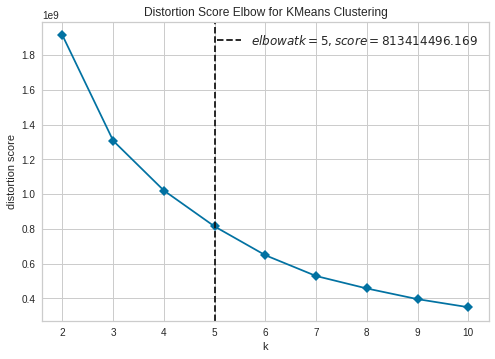

In [26]:
plot_model(kmeans, plot = 'elbow')

In [27]:
plot_model(kmeans, plot = 'silhouette')

In [28]:
plot_model(kmeans, plot = 'distribution')

In [29]:
kmeans_df.to_csv('./patch_clusters/team_win_clusters.csv')

### Team & Lose by Patch

In [30]:
team_patch_lose_df.head()

patch  result    year  playoffs      game    playerid   gamelength  \
0   8.01       0  2018.0  0.000000  1.546053  155.263158  2142.390351   
2   8.02       0  2018.0  0.000000  1.441077  151.851852  2174.949495   
4   8.03       0  2018.0  0.000000  1.405714  153.428571  2159.100000   
6   8.04       0  2018.0  0.000000  1.482323  152.777778  2076.459596   
8   8.05       0  2018.0  0.334773  1.924406  155.507559  2062.680346   

      kills     deaths    assists  ...  opp_csat15  golddiffat15  xpdiffat15  \
0  6.517544  14.232456  15.570175  ...  552.109649  -1238.592105 -694.013158   
2  6.932660  14.666667  16.373737  ...  530.033670  -1348.511785 -765.791246   
4  6.840000  14.711429  16.545714  ...  534.205714  -1136.654286 -676.362857   
6  6.989899  14.684343  16.633838  ...  526.310606  -1272.063131 -788.893939   
8  7.447084  15.788337  17.431965  ...  521.010799  -1310.710583 -811.976242   

   csdiffat15  killsat15  assistsat15  deathsat15  opp_killsat15  \
0  -13.890351   1.728070     3.050439    2.747807       2.747807   
2  -13.198653   1.666667     2.962963    2.875421       2.872054   
4  -14.174286   1.697143     3.088571    2.662857       2.651429   
6  -12.141414   2.070707     3.707071    3.234848       3.227273   
8  -14.358531   2.222462     3.855292    3.533477       3.529158   

   opp_assistsat15  opp_deathsat15  
0         4.923246        1.736842  
2         5.427609        1.670034  
4         4.802857        1.705714  
6         5.803030        2.078283  
8         6.501080        2.222462  

[5 rows x 101 columns]

In [31]:
team_patch_lose_clu = setup(team_patch_lose_df, ignore_features = ['year', 'playoffs', 'game', 'playerid', 'result', \
                                      'firstblood', 'firstbloodkill', 'firstbloodassist', 'firstbloodvictim', \
                                      'firstdragon', 'opp_dragons', 'opp_elementaldrakes',\
                                     'infernals', 'mountains', 'clouds', 'oceans', 'dragons (type unknown)',\
                                     'opp_elders', 'firstherald', 'opp_heralds', 'firstbaron', 'opp_barons',\
                                     'firsttower', 'opp_towers', 'firstmidtower', 'firsttothreetowers',\
                                     'opp_inhibitors', 'damageshare', 'earnedgoldshare', 'total cs'], session_id = 123)


Setup Succesfully Completed!


In [32]:
kmeans = create_model('kmeans', num_clusters = 6)

In [33]:
kmeans_df = assign_model(kmeans)

In [34]:
plot_model(kmeans) 

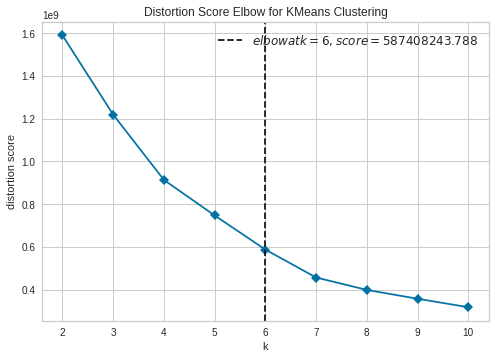

In [35]:
plot_model(kmeans, plot = 'elbow')

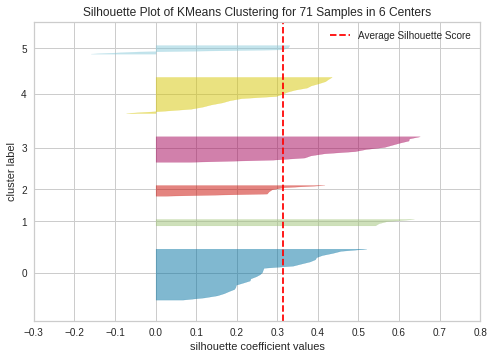

In [36]:
plot_model(kmeans, plot = 'silhouette')

In [37]:
plot_model(kmeans, plot = 'distribution')

In [38]:
kmeans_df.to_csv('./patch_clusters/team_lose_clusters.csv')

### Top & Win by Patch

In [39]:
top_win_patch_df.head()

patch  result position    year  playoffs      game  playerid   gamelength  \
9    8.01       1      top  2018.0  0.000000  1.546053  3.236842  2142.390351   
19   8.02       1      top  2018.0  0.000000  1.441077  3.407407  2174.949495   
29   8.03       1      top  2018.0  0.000000  1.418879  3.315634  2157.430678   
39   8.04       1      top  2018.0  0.000000  1.497396  3.369792  2081.411458   
49   8.05       1      top  2018.0  0.329596  1.923767  3.244395  2066.302691   

       kills    deaths  ...  opp_csat15  golddiffat15  xpdiffat15  csdiffat15  \
9   2.892544  1.432018  ...  127.756579    263.355263  163.311404    3.157895   
19  2.740741  1.528620  ...  128.040404    259.144781  102.282828    0.737374   
29  2.631268  1.374631  ...  128.666667    240.277286  148.681416    3.637168   
39  2.500000  1.515625  ...  128.218750    177.997396   81.424479    0.898438   
49  2.654709  1.639013  ...  126.719731    166.665919   90.865471    0.952915   

    killsat15  assistsat15  deathsat15  opp_killsat15  opp_assistsat15  \
9    0.524123     0.765351    0.405702       0.337719         0.537281   
19   0.538721     0.808081    0.397306       0.319865         0.397306   
29   0.424779     0.669617    0.356932       0.277286         0.415929   
39   0.539062     0.729167    0.473958       0.348958         0.528646   
49   0.594170     0.973094    0.502242       0.414798         0.600897   

    opp_deathsat15  
9         0.559211  
19        0.592593  
29        0.504425  
39        0.598958  
49        0.683857  

[5 rows x 102 columns]

In [40]:
top_patch_win_clu = setup(top_win_patch_df, ignore_features = ['year', 'playoffs', 'game', 'playerid', 'result', \
                                      'firstblood', 'firstbloodkill', 'firstbloodassist', 'firstbloodvictim', \
                                      'firstdragon', 'opp_dragons', 'opp_elementaldrakes',\
                                     'infernals', 'mountains', 'clouds', 'oceans', 'dragons (type unknown)',\
                                     'opp_elders', 'firstherald', 'opp_heralds', 'firstbaron', 'opp_barons',\
                                     'firsttower', 'opp_towers', 'firstmidtower', 'firsttothreetowers',\
                                     'opp_inhibitors', 'damageshare', 'earnedgoldshare', 'total cs'], session_id = 123)


Setup Succesfully Completed!


In [41]:
kmeans = create_model('kmeans', num_clusters = 5)

In [42]:
kmeans_df = assign_model(kmeans)

In [43]:
plot_model(kmeans) 

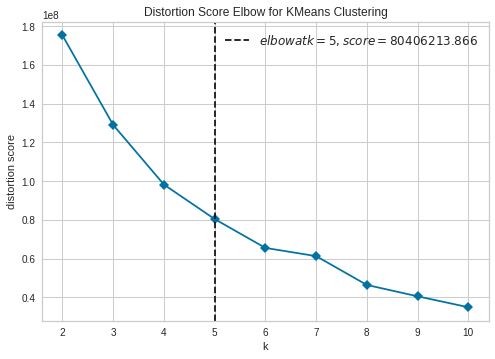

In [44]:
plot_model(kmeans, plot = 'elbow')

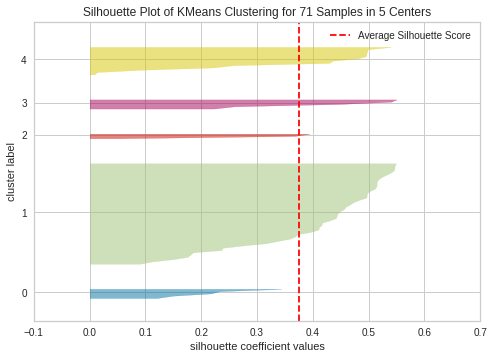

In [45]:
plot_model(kmeans, plot = 'silhouette')

In [46]:
plot_model(kmeans, plot = 'distribution')

In [47]:
kmeans_df.to_csv('./patch_clusters/top_win_clusters.csv')

### Top & Lose by Patch

In [48]:
top_lose_patch_df.head()

patch  result position    year  playoffs      game  playerid   gamelength  \
4    8.01       0      top  2018.0  0.000000  1.546053  3.763158  2142.390351   
14   8.02       0      top  2018.0  0.000000  1.441077  3.592593  2174.949495   
24   8.03       0      top  2018.0  0.000000  1.418879  3.684366  2157.430678   
34   8.04       0      top  2018.0  0.000000  1.497396  3.630208  2081.411458   
44   8.05       0      top  2018.0  0.329596  1.923767  3.775785  2066.302691   

       kills    deaths  ...  opp_csat15  golddiffat15  xpdiffat15  csdiffat15  \
4   1.243421  2.951754  ...  130.914474   -263.355263 -163.311404   -3.157895   
14  1.279461  3.023569  ...  128.777778   -259.144781 -102.282828   -0.737374   
24  1.297935  2.864307  ...  132.303835   -240.277286 -148.681416   -3.637168   
34  1.343750  2.822917  ...  129.117188   -177.997396  -81.424479   -0.898438   
44  1.311659  3.123318  ...  127.672646   -166.665919  -90.865471   -0.952915   

    killsat15  assistsat15  deathsat15  opp_killsat15  opp_assistsat15  \
4    0.337719     0.537281    0.559211       0.524123         0.765351   
14   0.319865     0.397306    0.592593       0.538721         0.808081   
24   0.277286     0.415929    0.504425       0.424779         0.669617   
34   0.348958     0.528646    0.598958       0.539062         0.729167   
44   0.414798     0.600897    0.683857       0.594170         0.973094   

    opp_deathsat15  
4         0.405702  
14        0.397306  
24        0.356932  
34        0.473958  
44        0.502242  

[5 rows x 102 columns]

In [49]:
top_patch_lose_clu = setup(top_lose_patch_df, ignore_features = ['year', 'playoffs', 'game', 'playerid', 'result', \
                                      'firstblood', 'firstbloodkill', 'firstbloodassist', 'firstbloodvictim', \
                                      'firstdragon', 'opp_dragons', 'opp_elementaldrakes',\
                                     'infernals', 'mountains', 'clouds', 'oceans', 'dragons (type unknown)',\
                                     'opp_elders', 'firstherald', 'opp_heralds', 'firstbaron', 'opp_barons',\
                                     'firsttower', 'opp_towers', 'firstmidtower', 'firsttothreetowers',\
                                     'opp_inhibitors', 'damageshare', 'earnedgoldshare', 'total cs'], session_id = 123)


Setup Succesfully Completed!


In [50]:
kmeans = create_model('kmeans', num_clusters = 5)

In [51]:
kmeans_df = assign_model(kmeans)

In [52]:
plot_model(kmeans) 

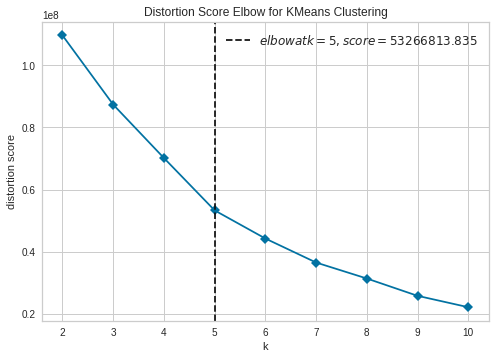

In [53]:
plot_model(kmeans, plot = 'elbow')

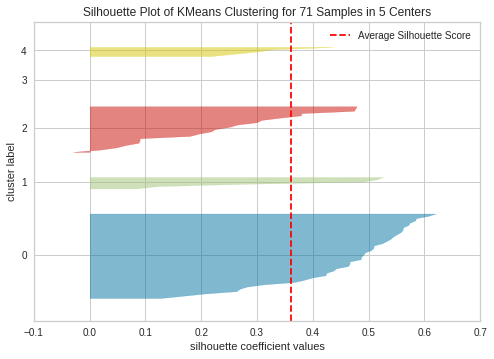

In [54]:
plot_model(kmeans, plot = 'silhouette')

In [55]:
plot_model(kmeans, plot = 'distribution')

In [56]:
kmeans_df.to_csv('./patch_clusters/top_lose_clusters.csv')

### Jng & Win by Patch

In [57]:
jng_win_patch_df.head()

patch  result position    year  playoffs      game  playerid   gamelength  \
6    8.01       1      jng  2018.0  0.000000  1.546053  4.236842  2142.390351   
16   8.02       1      jng  2018.0  0.000000  1.441077  4.407407  2174.949495   
26   8.03       1      jng  2018.0  0.000000  1.418879  4.315634  2157.430678   
36   8.04       1      jng  2018.0  0.000000  1.497396  4.369792  2081.411458   
46   8.05       1      jng  2018.0  0.329596  1.923767  4.237668  2066.302691   

       kills    deaths  ...  opp_csat15  golddiffat15  xpdiffat15  csdiffat15  \
6   2.067982  1.506579  ...   85.640351    208.618421   99.535088    1.486842   
16  1.932660  1.484848  ...   82.976431    253.336700  138.801347    3.067340   
26  1.873156  1.566372  ...   84.952802    221.147493  113.923304    2.233038   
36  2.312500  1.471354  ...   85.502604    262.585938  157.593750    2.427083   
46  2.363229  1.605381  ...   83.423767    291.031390  178.439462    3.780269   

    killsat15  assistsat15  deathsat15  opp_killsat15  opp_assistsat15  \
6    0.673246     1.368421    0.418860       0.486842         0.835526   
16   0.632997     1.511785    0.313131       0.326599         0.892256   
26   0.628319     1.380531    0.389381       0.401180         0.890855   
36   0.921875     1.559896    0.432292       0.567708         1.033854   
46   0.910314     1.746637    0.461883       0.636771         1.031390   

    opp_deathsat15  
6         0.673246  
16        0.683502  
26        0.587021  
36        0.703125  
46        0.793722  

[5 rows x 102 columns]

In [65]:
jng_patch_win_clu = setup(jng_win_patch_df, ignore_features = ['year', 'playoffs', 'game', 'playerid', 'result', \
                                      'firstblood', 'firstbloodkill', 'firstbloodassist', 'firstbloodvictim', \
                                      'firstdragon', 'opp_dragons', 'opp_elementaldrakes',\
                                     'infernals', 'mountains', 'clouds', 'oceans', 'dragons (type unknown)',\
                                     'opp_elders', 'firstherald', 'opp_heralds', 'firstbaron', 'opp_barons',\
                                     'firsttower', 'opp_towers', 'firstmidtower', 'firsttothreetowers',\
                                     'opp_inhibitors', 'damageshare', 'earnedgoldshare', 'total cs'], session_id = 123)


Setup Succesfully Completed!


In [66]:
kmeans = create_model('kmeans', num_clusters = 4)

In [67]:
kmeans_df = assign_model(kmeans)

In [68]:
plot_model(kmeans) 

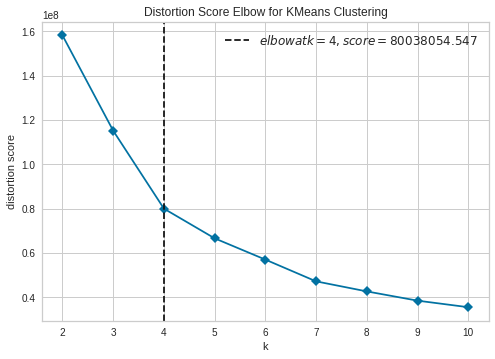

In [69]:
plot_model(kmeans, plot = 'elbow')

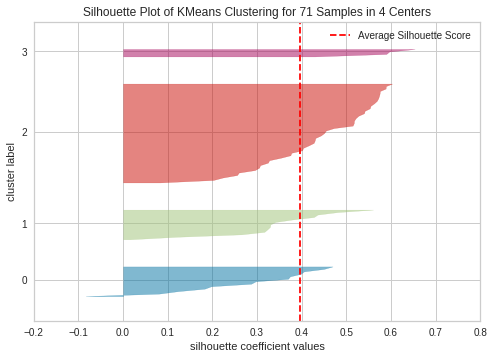

In [70]:
plot_model(kmeans, plot = 'silhouette')

In [71]:
plot_model(kmeans, plot = 'distribution')

In [72]:
kmeans_df.to_csv('./patch_clusters/jng_win_clusters.csv')

### Jng & Lose by Patch

In [73]:
jng_lose_patch_df.head()

patch  result position    year  playoffs      game  playerid   gamelength  \
1    8.01       0      jng  2018.0  0.000000  1.546053  4.763158  2142.390351   
11   8.02       0      jng  2018.0  0.000000  1.441077  4.592593  2174.949495   
21   8.03       0      jng  2018.0  0.000000  1.418879  4.684366  2157.430678   
31   8.04       0      jng  2018.0  0.000000  1.497396  4.630208  2081.411458   
41   8.05       0      jng  2018.0  0.329596  1.923767  4.769058  2066.302691   

       kills    deaths  ...  opp_csat15  golddiffat15  xpdiffat15  csdiffat15  \
1   1.162281  3.190789  ...   87.127193   -208.618421  -99.535088   -1.486842   
11  0.861953  3.292929  ...   86.043771   -253.336700 -138.801347   -3.067340   
21  0.914454  3.227139  ...   87.185841   -221.147493 -113.923304   -2.233038   
31  1.226562  3.257812  ...   87.929688   -262.585938 -157.593750   -2.427083   
41  1.343049  3.432735  ...   87.204036   -291.031390 -178.439462   -3.780269   

    killsat15  assistsat15  deathsat15  opp_killsat15  opp_assistsat15  \
1    0.486842     0.835526    0.673246       0.673246         1.368421   
11   0.326599     0.892256    0.683502       0.632997         1.511785   
21   0.401180     0.890855    0.587021       0.628319         1.380531   
31   0.567708     1.033854    0.703125       0.921875         1.559896   
41   0.636771     1.031390    0.793722       0.910314         1.746637   

    opp_deathsat15  
1         0.418860  
11        0.313131  
21        0.389381  
31        0.432292  
41        0.461883  

[5 rows x 102 columns]

In [74]:
jng_patch_lose_clu = setup(jng_lose_patch_df, ignore_features = ['year', 'playoffs', 'game', 'playerid', 'result', \
                                      'firstblood', 'firstbloodkill', 'firstbloodassist', 'firstbloodvictim', \
                                      'firstdragon', 'opp_dragons', 'opp_elementaldrakes',\
                                     'infernals', 'mountains', 'clouds', 'oceans', 'dragons (type unknown)',\
                                     'opp_elders', 'firstherald', 'opp_heralds', 'firstbaron', 'opp_barons',\
                                     'firsttower', 'opp_towers', 'firstmidtower', 'firsttothreetowers',\
                                     'opp_inhibitors', 'damageshare', 'earnedgoldshare', 'total cs'], session_id = 123)


Setup Succesfully Completed!


In [79]:
kmeans = create_model('kmeans', num_clusters = 4)

In [80]:
kmeans_df = assign_model(kmeans)

In [81]:
plot_model(kmeans) 

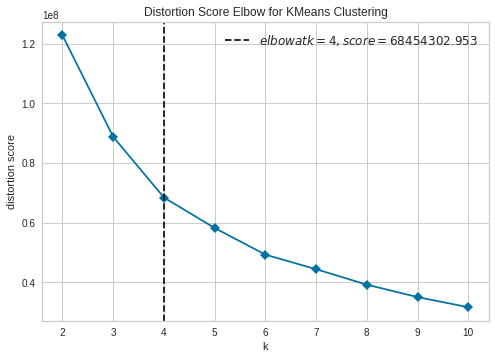

In [82]:
plot_model(kmeans, plot = 'elbow')

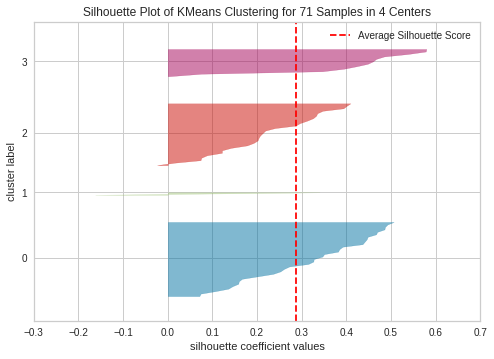

In [83]:
plot_model(kmeans, plot = 'silhouette')

In [84]:
plot_model(kmeans, plot = 'distribution')

In [85]:
kmeans_df.to_csv('./patch_clusters/jng_lose_clusters.csv')

### Mid & Win by Patch

In [86]:
mid_win_patch_df.head()

patch  result position    year  playoffs      game  playerid   gamelength  \
7    8.01       1      mid  2018.0  0.000000  1.546053  5.236842  2142.390351   
17   8.02       1      mid  2018.0  0.000000  1.441077  5.407407  2174.949495   
27   8.03       1      mid  2018.0  0.000000  1.418879  5.315634  2157.430678   
37   8.04       1      mid  2018.0  0.000000  1.497396  5.369792  2081.411458   
47   8.05       1      mid  2018.0  0.329596  1.923767  5.237668  2066.302691   

       kills    deaths  ...  opp_csat15  golddiffat15  xpdiffat15  csdiffat15  \
7   4.059211  1.269737  ...  143.129386    286.190789  180.723684    4.565789   
17  4.289562  1.208754  ...  145.104377    273.905724  186.612795    3.464646   
27  4.330383  1.194690  ...  146.584071    283.371681  194.964602    3.837758   
37  3.890625  1.328125  ...  143.559896    265.018229  237.841146    3.552083   
47  4.569507  1.336323  ...  141.762332    324.322870  210.096413    4.114350   

    killsat15  assistsat15  deathsat15  opp_killsat15  opp_assistsat15  \
7    0.815789     0.846491    0.342105       0.510965         0.537281   
17   0.821549     0.892256    0.340067       0.545455         0.447811   
27   0.790560     0.790560    0.292035       0.439528         0.519174   
37   0.742188     1.057292    0.367188       0.505208         0.578125   
47   0.955157     1.067265    0.405830       0.506726         0.618834   

    opp_deathsat15  
7         0.559211  
17        0.552189  
27        0.563422  
37        0.614583  
47        0.679372  

[5 rows x 102 columns]

In [87]:
mid_patch_win_clu = setup(mid_win_patch_df, ignore_features = ['year', 'playoffs', 'game', 'playerid', 'result', \
                                      'firstblood', 'firstbloodkill', 'firstbloodassist', 'firstbloodvictim', \
                                      'firstdragon', 'opp_dragons', 'opp_elementaldrakes',\
                                     'infernals', 'mountains', 'clouds', 'oceans', 'dragons (type unknown)',\
                                     'opp_elders', 'firstherald', 'opp_heralds', 'firstbaron', 'opp_barons',\
                                     'firsttower', 'opp_towers', 'firstmidtower', 'firsttothreetowers',\
                                     'opp_inhibitors', 'damageshare', 'earnedgoldshare', 'total cs'], session_id = 123)


Setup Succesfully Completed!


In [88]:
kmeans = create_model('kmeans', num_clusters = 4)

In [89]:
kmeans_df = assign_model(kmeans)

In [90]:
plot_model(kmeans) 

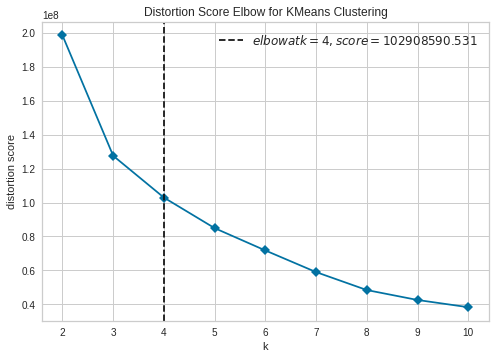

In [91]:
plot_model(kmeans, plot = 'elbow')

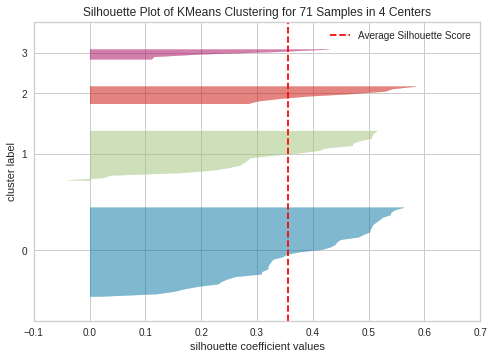

In [92]:
plot_model(kmeans, plot = 'silhouette')

In [93]:
plot_model(kmeans, plot = 'distribution')

In [94]:
kmeans_df.to_csv('./patch_clusters/mid_win_clusters.csv')

### Mid & Lose by Patch

In [95]:
mid_lose_patch_df.head()

patch  result position    year  playoffs      game  playerid   gamelength  \
2    8.01       0      mid  2018.0  0.000000  1.546053  5.763158  2142.390351   
12   8.02       0      mid  2018.0  0.000000  1.441077  5.592593  2174.949495   
22   8.03       0      mid  2018.0  0.000000  1.418879  5.684366  2157.430678   
32   8.04       0      mid  2018.0  0.000000  1.497396  5.630208  2081.411458   
42   8.05       0      mid  2018.0  0.329596  1.923767  5.769058  2066.302691   

       kills    deaths  ...  opp_csat15  golddiffat15  xpdiffat15  csdiffat15  \
2   1.811404  2.686404  ...  147.695175   -286.190789 -180.723684   -4.565789   
12  2.309764  2.680135  ...  148.569024   -273.905724 -186.612795   -3.464646   
22  1.985251  2.787611  ...  150.421829   -283.371681 -194.964602   -3.837758   
32  1.888021  2.773438  ...  147.111979   -265.018229 -237.841146   -3.552083   
42  2.013453  2.865471  ...  145.876682   -324.322870 -210.096413   -4.114350   

    killsat15  assistsat15  deathsat15  opp_killsat15  opp_assistsat15  \
2    0.510965     0.537281    0.559211       0.815789         0.846491   
12   0.545455     0.447811    0.552189       0.821549         0.892256   
22   0.439528     0.519174    0.563422       0.790560         0.790560   
32   0.505208     0.578125    0.614583       0.742188         1.057292   
42   0.506726     0.618834    0.679372       0.955157         1.067265   

    opp_deathsat15  
2         0.342105  
12        0.340067  
22        0.292035  
32        0.367188  
42        0.405830  

[5 rows x 102 columns]

In [96]:
mid_patch_lose_clu = setup(mid_lose_patch_df, ignore_features = ['year', 'playoffs', 'game', 'playerid', 'result', \
                                      'firstblood', 'firstbloodkill', 'firstbloodassist', 'firstbloodvictim', \
                                      'firstdragon', 'opp_dragons', 'opp_elementaldrakes',\
                                     'infernals', 'mountains', 'clouds', 'oceans', 'dragons (type unknown)',\
                                     'opp_elders', 'firstherald', 'opp_heralds', 'firstbaron', 'opp_barons',\
                                     'firsttower', 'opp_towers', 'firstmidtower', 'firsttothreetowers',\
                                     'opp_inhibitors', 'damageshare', 'earnedgoldshare', 'total cs'], session_id = 123)


Setup Succesfully Completed!


In [97]:
kmeans = create_model('kmeans', num_clusters = 4)

In [98]:
kmeans_df = assign_model(kmeans)

In [99]:
plot_model(kmeans) 

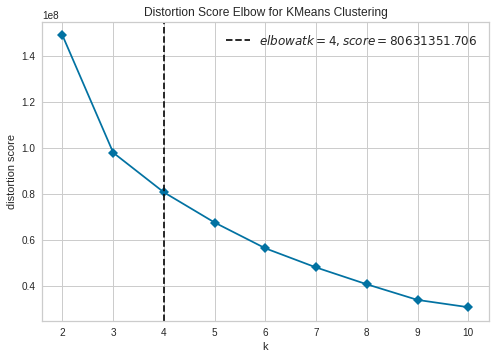

In [100]:
plot_model(kmeans, plot = 'elbow')

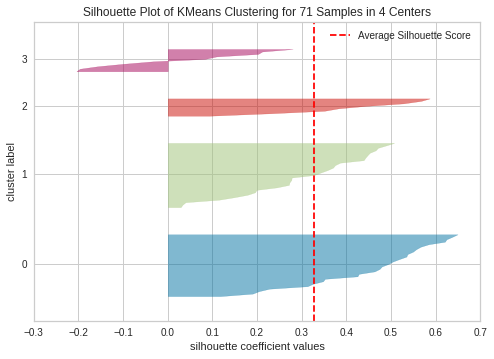

In [101]:
plot_model(kmeans, plot = 'silhouette')

In [102]:
plot_model(kmeans, plot = 'distribution')

In [103]:
kmeans_df.to_csv('./patch_clusters/mid_lose_clusters.csv')

### Bot & Win by Patch

In [104]:
bot_win_patch_df.head()

patch  result position    year  playoffs      game  playerid   gamelength  \
5    8.01       1      bot  2018.0  0.000000  1.546053  6.236842  2142.390351   
15   8.02       1      bot  2018.0  0.000000  1.441077  6.407407  2174.949495   
25   8.03       1      bot  2018.0  0.000000  1.418879  6.315634  2157.430678   
35   8.04       1      bot  2018.0  0.000000  1.497396  6.369792  2081.411458   
45   8.05       1      bot  2018.0  0.329596  1.923767  6.221973  2066.302691   

       kills    deaths  ...  opp_csat15  golddiffat15  xpdiffat15  csdiffat15  \
5   4.464912  0.980263  ...  140.763158    326.307018  146.787281    3.629386   
15  4.898990  1.191919  ...  139.528620    385.087542  182.286195    5.814815   
25  4.988201  1.023599  ...  139.943953    283.067847  172.616519    4.705015   
35  5.070312  1.059896  ...  137.138021    377.705729  200.885417    5.812500   
45  5.385650  1.103139  ...  136.816143    353.982063  215.874439    4.988789   

    killsat15  assistsat15  deathsat15  opp_killsat15  opp_assistsat15  \
5    0.519737     0.745614    0.258772       0.287281         0.423246   
15   0.643098     0.757576    0.269360       0.329966         0.481481   
25   0.563422     0.743363    0.247788       0.395280         0.451327   
35   0.687500     0.924479    0.333333       0.419271         0.598958   
45   0.786996     1.044843    0.352018       0.464126         0.612108   

    opp_deathsat15  
5         0.429825  
15        0.525253  
25        0.407080  
35        0.630208  
45        0.614350  

[5 rows x 102 columns]

In [105]:
bot_patch_win_clu = setup(bot_win_patch_df, ignore_features = ['year', 'playoffs', 'game', 'playerid', 'result', \
                                      'firstblood', 'firstbloodkill', 'firstbloodassist', 'firstbloodvictim', \
                                      'firstdragon', 'opp_dragons', 'opp_elementaldrakes',\
                                     'infernals', 'mountains', 'clouds', 'oceans', 'dragons (type unknown)',\
                                     'opp_elders', 'firstherald', 'opp_heralds', 'firstbaron', 'opp_barons',\
                                     'firsttower', 'opp_towers', 'firstmidtower', 'firsttothreetowers',\
                                     'opp_inhibitors', 'damageshare', 'earnedgoldshare', 'total cs'], session_id = 123)


Setup Succesfully Completed!


In [110]:
kmeans = create_model('kmeans', num_clusters = 5)

In [111]:
kmeans_df = assign_model(kmeans)

In [112]:
plot_model(kmeans) 

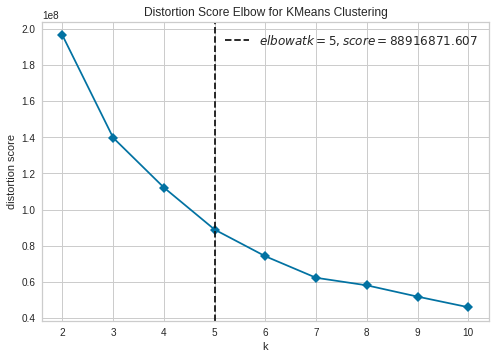

In [113]:
plot_model(kmeans, plot = 'elbow')

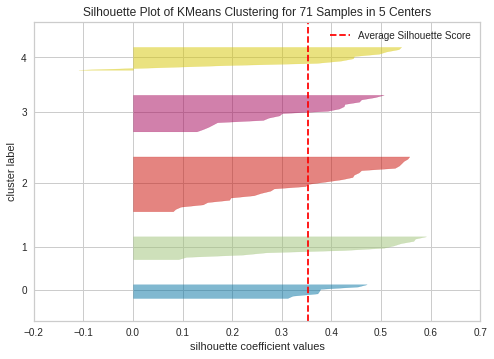

In [114]:
plot_model(kmeans, plot = 'silhouette')

In [115]:
plot_model(kmeans, plot = 'distribution')

In [116]:
kmeans_df.to_csv('./patch_clusters/bot_win_clusters.csv')

### Bot & Lose by Patch

In [118]:
bot_lose_patch_df.head()

patch  result position    year  playoffs      game  playerid   gamelength  \
0    8.01       0      bot  2018.0  0.000000  1.546053  6.763158  2142.390351   
10   8.02       0      bot  2018.0  0.000000  1.441077  6.592593  2174.949495   
20   8.03       0      bot  2018.0  0.000000  1.418879  6.684366  2157.430678   
30   8.04       0      bot  2018.0  0.000000  1.497396  6.630208  2081.411458   
40   8.05       0      bot  2018.0  0.329596  1.923767  6.762332  2066.302691   

       kills    deaths  ...  opp_csat15  golddiffat15  xpdiffat15  csdiffat15  \
0   1.885965  2.390351  ...  144.392544   -326.307018 -146.787281   -3.629386   
10  2.090909  2.646465  ...  145.343434   -385.087542 -182.286195   -5.814815   
20  2.132743  2.504425  ...  144.648968   -283.067847 -172.616519   -4.705015   
30  2.065104  2.583333  ...  142.950521   -377.705729 -200.885417   -5.812500   
40  2.311659  2.795964  ...  141.804933   -353.982063 -215.874439   -4.988789   

    killsat15  assistsat15  deathsat15  opp_killsat15  opp_assistsat15  \
0    0.287281     0.423246    0.429825       0.519737         0.745614   
10   0.329966     0.481481    0.525253       0.643098         0.757576   
20   0.395280     0.451327    0.407080       0.563422         0.743363   
30   0.419271     0.598958    0.630208       0.687500         0.924479   
40   0.464126     0.612108    0.614350       0.786996         1.044843   

    opp_deathsat15  
0         0.258772  
10        0.269360  
20        0.247788  
30        0.333333  
40        0.352018  

[5 rows x 102 columns]

In [119]:
bot_patch_lose_clu = setup(bot_lose_patch_df, ignore_features = ['year', 'playoffs', 'game', 'playerid', 'result', \
                                      'firstblood', 'firstbloodkill', 'firstbloodassist', 'firstbloodvictim', \
                                      'firstdragon', 'opp_dragons', 'opp_elementaldrakes',\
                                     'infernals', 'mountains', 'clouds', 'oceans', 'dragons (type unknown)',\
                                     'opp_elders', 'firstherald', 'opp_heralds', 'firstbaron', 'opp_barons',\
                                     'firsttower', 'opp_towers', 'firstmidtower', 'firsttothreetowers',\
                                     'opp_inhibitors', 'damageshare', 'earnedgoldshare', 'total cs'], session_id = 123)


Setup Succesfully Completed!


In [124]:
kmeans = create_model('kmeans', num_clusters = 4)

In [125]:
kmeans_df = assign_model(kmeans)

In [126]:
plot_model(kmeans) 

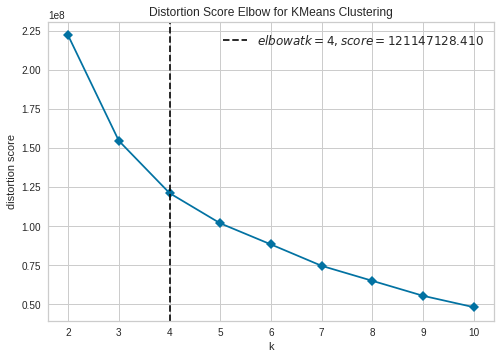

In [127]:
plot_model(kmeans, plot = 'elbow')

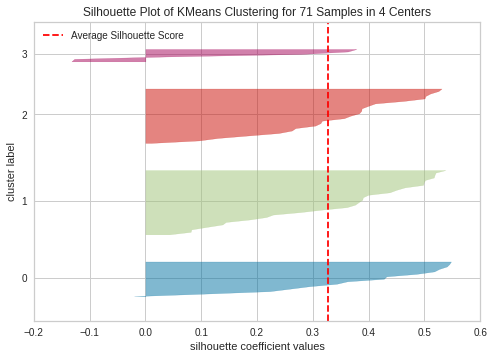

In [128]:
plot_model(kmeans, plot = 'silhouette')

In [129]:
plot_model(kmeans, plot = 'distribution')

In [130]:
kmeans_df.to_csv('./patch_clusters/bot_lose_clusters.csv')

### Sup & Win by Patch

In [131]:
sup_win_patch_df.head()

patch  result position    year  playoffs      game  playerid   gamelength  \
8    8.01       1      sup  2018.0  0.000000  1.546053  7.236842  2142.390351   
18   8.02       1      sup  2018.0  0.000000  1.441077  7.407407  2174.949495   
28   8.03       1      sup  2018.0  0.000000  1.418879  7.315634  2157.430678   
38   8.04       1      sup  2018.0  0.000000  1.497396  7.369792  2081.411458   
48   8.05       1      sup  2018.0  0.329596  1.923767  7.213004  2066.302691   

       kills    deaths  ...  opp_csat15  golddiffat15  xpdiffat15  csdiffat15  \
8   0.745614  1.344298  ...   40.929825    154.120614  103.655702    1.050439   
18  0.797980  1.535354  ...   21.185185    177.037037  155.808081    0.114478   
28  0.837758  1.666667  ...   20.412979    137.008850   62.230088    0.194690   
38  0.875000  1.627604  ...   20.682292    179.598958   84.906250   -0.994792   
48  0.836323  1.800448  ...   18.706278    157.943946   99.742152    0.204036   

    killsat15  assistsat15  deathsat15  opp_killsat15  opp_assistsat15  \
8    0.214912     1.197368    0.311404       0.105263         0.717105   
18   0.235690     1.457912    0.350168       0.144781         0.744108   
28   0.230088     1.253687    0.401180       0.165192         0.793510   
38   0.307292     1.473958    0.463542       0.221354         0.958333   
48   0.291480     1.708520    0.517937       0.217489         1.026906   

    opp_deathsat15  
8         0.526316  
18        0.521886  
28        0.587021  
38        0.658854  
48        0.771300  

[5 rows x 102 columns]

In [132]:
sup_patch_win_clu = setup(sup_win_patch_df, ignore_features = ['year', 'playoffs', 'game', 'playerid', 'result', \
                                      'firstblood', 'firstbloodkill', 'firstbloodassist', 'firstbloodvictim', \
                                      'firstdragon', 'opp_dragons', 'opp_elementaldrakes',\
                                     'infernals', 'mountains', 'clouds', 'oceans', 'dragons (type unknown)',\
                                     'opp_elders', 'firstherald', 'opp_heralds', 'firstbaron', 'opp_barons',\
                                     'firsttower', 'opp_towers', 'firstmidtower', 'firsttothreetowers',\
                                     'opp_inhibitors', 'damageshare', 'earnedgoldshare', 'total cs'], session_id = 123)


Setup Succesfully Completed!


In [137]:
kmeans = create_model('kmeans', num_clusters = 4)

In [138]:
kmeans_df = assign_model(kmeans)

In [139]:
plot_model(kmeans) 

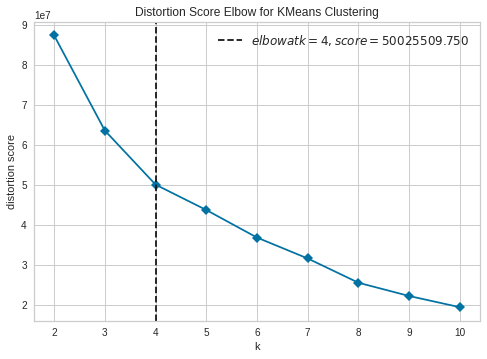

In [140]:
plot_model(kmeans, plot = 'elbow')

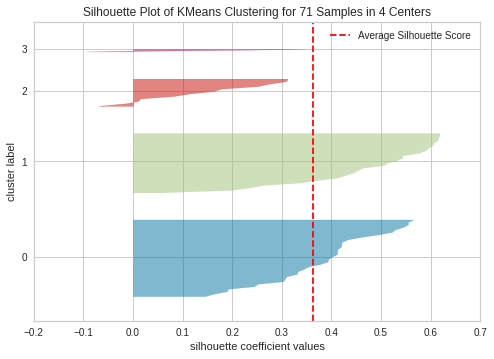

In [141]:
plot_model(kmeans, plot = 'silhouette')

In [142]:
plot_model(kmeans, plot = 'distribution')

In [143]:
kmeans_df.to_csv('./patch_clusters/sup_win_clusters.csv')

### Sup & Lose by Patch

In [144]:
sup_lose_patch_df.head()

patch  result position    year  playoffs      game  playerid   gamelength  \
3    8.01       0      sup  2018.0  0.000000  1.546053  7.763158  2142.390351   
13   8.02       0      sup  2018.0  0.000000  1.441077  7.592593  2174.949495   
23   8.03       0      sup  2018.0  0.000000  1.418879  7.684366  2157.430678   
33   8.04       0      sup  2018.0  0.000000  1.497396  7.630208  2081.411458   
43   8.05       0      sup  2018.0  0.329596  1.923767  7.769058  2066.302691   

       kills    deaths  ...  opp_csat15  golddiffat15  xpdiffat15  csdiffat15  \
3   0.414474  3.013158  ...   41.980263   -154.120614 -103.655702   -1.050439   
13  0.390572  3.023569  ...   21.299663   -177.037037 -155.808081   -0.114478   
23  0.463127  3.294985  ...   20.607670   -137.008850  -62.230088   -0.194690   
33  0.468750  3.226562  ...   19.687500   -179.598958  -84.906250    0.994792   
43  0.484305  3.596413  ...   18.910314   -157.943946  -99.742152   -0.204036   

    killsat15  assistsat15  deathsat15  opp_killsat15  opp_assistsat15  \
3    0.105263     0.717105    0.526316       0.214912         1.197368   
13   0.144781     0.744108    0.521886       0.235690         1.457912   
23   0.165192     0.793510    0.587021       0.230088         1.253687   
33   0.221354     0.958333    0.658854       0.307292         1.473958   
43   0.217489     1.026906    0.771300       0.291480         1.708520   

    opp_deathsat15  
3         0.311404  
13        0.350168  
23        0.401180  
33        0.463542  
43        0.517937  

[5 rows x 102 columns]

In [145]:
sup_patch_lose_clu = setup(sup_lose_patch_df, ignore_features = ['year', 'playoffs', 'game', 'playerid', 'result', \
                                      'firstblood', 'firstbloodkill', 'firstbloodassist', 'firstbloodvictim', \
                                      'firstdragon', 'opp_dragons', 'opp_elementaldrakes',\
                                     'infernals', 'mountains', 'clouds', 'oceans', 'dragons (type unknown)',\
                                     'opp_elders', 'firstherald', 'opp_heralds', 'firstbaron', 'opp_barons',\
                                     'firsttower', 'opp_towers', 'firstmidtower', 'firsttothreetowers',\
                                     'opp_inhibitors', 'damageshare', 'earnedgoldshare', 'total cs'], session_id = 123)


Setup Succesfully Completed!


In [146]:
kmeans = create_model('kmeans', num_clusters = 4)

In [147]:
kmeans_df = assign_model(kmeans)

In [148]:
plot_model(kmeans) 

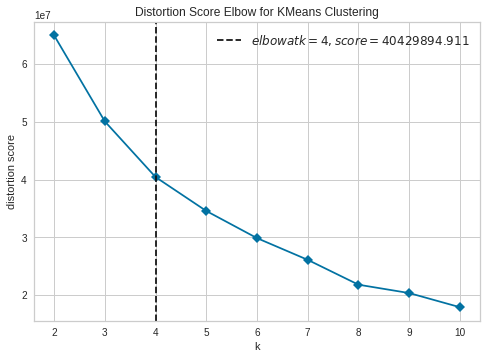

In [149]:
plot_model(kmeans, plot = 'elbow')

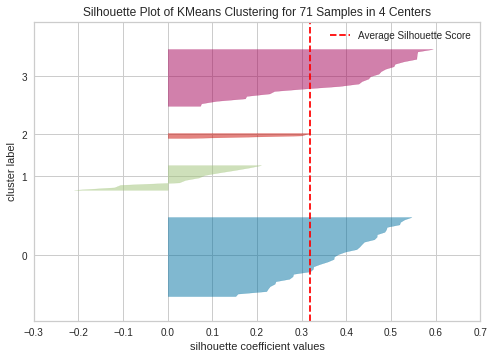

In [150]:
plot_model(kmeans, plot = 'silhouette')

In [151]:
plot_model(kmeans, plot = 'distribution')

In [152]:
kmeans_df.to_csv('./patch_clusters/sup_lose_clusters.csv')